In [2]:
import pandas as pd
import numpy as np
import copy

# Web scraper task
Here is the part where you modify the cells. Modify the range of pages in the first for loop, the keyword to signal comment extraction (if necessary), and the target language for translation (if necessary) 

In [3]:
import time
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.by import By

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

directory_of_chromedriver=r"C:\Users\celin\Documents\chromedriver.exe"

In [57]:
# Separate each review AND extract the rating

# Котлеты домашние из растительного мяса, Welldone, 180 г 491037254
# Котлеты для бургеров из растительного мяса, Welldone, 200 г 491165096
# Фарш из растительного мяса, Welldone, 400 г 491083590
# Котлеты растительные Hiburger для бургера Hi, 800 г 229186105
# Наггетсы растительные Hi - Higgets, замороженные, 200 г 317602877
# Филе растительное со вкусом говядины Hi 200г, 400 г 626538288


res = []
product_id = 491037254
for i in range(1,12):
    attempt_counter = 0
    result = False
    while attempt_counter < 5 and not result:
        try:
            driver = webdriver.Chrome(executable_path=directory_of_chromedriver)
            driver.get(f'https://www.ozon.ru/product/{product_id}/reviews?page={i}')
            
            review_elements = driver.find_elements(By.XPATH, '//div[@class="sq"]')
            rating_elements = driver.find_elements(By.XPATH, '//div[@class="e1-a6"]')
            
            for review, rating_element in zip(review_elements, rating_elements):
                review_text = review.text.splitlines()
                style_value = rating_element.get_attribute("style")
                rating = int(style_value.replace('width:', '').replace('%;', ''))/20   # Assuming 100% corresponds to 5 stars, 80% corresponds to 4 stars, etc.
                
                res.append((review_text, rating))
            
            driver.close()
            result = True
        except NoSuchElementException:
            print(f'Page {i}: Error N{attempt_counter+1}')
            attempt_counter += 1
            driver.close()
            
    if attempt_counter == 5:
        print(f'Error on page {i}')


C:\Users\celin\AppData\Local\Temp\ipykernel_19480\3130613607.py:18: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=directory_of_chromedriver)


In [58]:
len(res)

165

In [59]:
# copy data
data = res.copy() 

# extract information
data_extracted = []

for item in data:
    review = item[0]
    rating = item[1]
    
    try:
        name_index = review.index('Товар куплен на OZON') - 2
        name = review[name_index]
    except ValueError:
        date = None

    try:
        date_index = review.index('Товар куплен на OZON') - 1
        date = review[date_index]
    except ValueError:
        date = None

    try:
        advantages_index = review.index('Достоинства') + 1
        advantages = review[advantages_index]
    except ValueError:
        advantages = None
    
    try:
        disadvantages_index = review.index('Недостатки') + 1
        disadvantages = review[disadvantages_index]
    except ValueError:
        disadvantages = None
    
    try:
        comment_index = review.index('Комментарий') + 1
        comment = review[comment_index]
    except ValueError:
        comment = None
    
    data_extracted.append((product_id, name, date, advantages, disadvantages, comment, rating))


df = pd.DataFrame(data_extracted, columns=['product_id', 'name', 'date', 'advantages', 'disadvantages', 'comment', 'rating'])

print(df)


     product_id                                       name           date   
0     626538288                                  Венера К.  7 Апреля 2023  \
1     626538288                                   Мария Г.    24 Мая 2023   
2     626538288                                   Ирада А.    21 Мая 2023   
3     626538288  Пользователь предпочёл скрыть свои данные     2 Мая 2023   
4     626538288                                   Олеся П.  2 Апреля 2023   
..          ...                                        ...            ...   
160   626538288  Пользователь предпочёл скрыть свои данные   22 Июля 2022   
161   626538288                                 Виталий Г.   16 Июля 2022   
162   626538288                                 Виталий Г.   16 Июля 2022   
163   626538288  Пользователь предпочёл скрыть свои данные   16 Июля 2022   
164   626538288                               Анастасия Ц.   14 Июля 2022   

           advantages                                      disadvantages   

In [60]:
df.to_csv('combined_reviews.csv', mode='a', header=True, encoding='utf-8-sig')

In [63]:
df = pd.read_csv('combined_reviews.csv')

In [64]:
df

,Unnamed: 0,product_id,name,date,advantages,disadvantages,comment,rating;
0,"0,491037254,Пользователь предпочёл скрыть свои...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"1,491037254,Алеся Х.,1 Апреля 2023,""Без мяса, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"2,491037254,Лилия Ш.,2 Декабря 2022,""это самые...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"3,491037254,Анна Р.,15 Мая 2023,""Хорошо, что с...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"4,491037254,Руссо Оксана,27 Марта 2023,""классн...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1425,"160,626538288,Пользователь предпочёл скрыть св...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1426,161,626538288.0,Виталий Г.,16 Июля 2022,Vegan!,Нет,Очень вкусно! Ни одна курица не пострадала,5.0;
1427,162,626538288.0,Виталий Г.,16 Июля 2022,Vegan,нет,Очень вкусно! Ни одна корова не пострадала,5.0;
1428,163,626538288.0,Пользователь предпочёл скрыть свои данные,16 Июля 2022,Много белка,NaN,NaN,5.0;


In [ ]:
#Translate comments
from yandexfreetranslate import YandexFreeTranslate
yt = YandexFreeTranslate(api = "ios")
df["translation"] = df["comment"].apply(lambda x: yt.translate('ru','en',
                x) if type(x) == str else x)

In [ ]:
#Alternative to translate comment, if the amount of request is to big
from yandexfreetranslate import YandexFreeTranslate
yt = YandexFreeTranslate(api = "ios")
chunk_size = 1000 # number of rows to translate per chunk

for i in range(0, len(df), chunk_size):
    start = i
    end = min(i + chunk_size, len(df))
    print(f"Translating rows {start+1} to {end}...")

    # translate the current chunk of rows
    df.loc[start:end, "translation"] = df.loc[start:end, "review"].apply(lambda x: yt.translate('ru','en',
                x) if type(x) == str else x)

In [ ]:
#Check for losses
df['translation'] = df['translation'].astype(str).str.lower()
print(len(df))
df.dropna(subset=['translation'])
print(len(df))

356
356


# Saving data in Google Drive

In [ ]:
import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe
from google.oauth2.service_account import Credentials
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

In [ ]:
#Create API and SERVICE credential on Google Cloud project, download and rename json
# https://docs.gspread.org/en/latest/oauth2.html use the step "for bots"
# run a shell to create a directory: mkdir %APPDATA%\gspread
# move credentials.json %APPDATA%\gspread\service_account.json
sa = gspread.service_account()
sh = sa.open("data-gspread")
#Set up the worksheet artifacts
wks1 = sh.worksheet('sheet1')
wks2 = sh.worksheet('sheet2')
wks3 = sh.worksheet('sheet3')
wks3.format('E', {'numberFormat': {'type' : 'NUMBER', 'pattern': '0.0#'}})
# to format the number with commas instead of dots, avoids headaches for later
# wks1.format('E', {'numberFormat': {'type' : 'NUMBER', 'pattern': '0,0#'}})
#if there are value on the worksheet, pull it
# headers = data.pop(0)

In [ ]:
#Upload final results in Google sheet
wks1.clear()
set_with_dataframe(
    worksheet=wks1, dataframe=df, include_index=False,
    include_column_header=False, resize=True)

In [ ]:
#Push merged results
wks2.clear()
set_with_dataframe(
    worksheet=wks2, dataframe=df, include_index=False,
    include_column_header=False, resize=True)

# Sentiment analysis tasks

In [ ]:
#Load once
from transformers import pipeline
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)
# with pd.option_context('display.max_colwidth', None):
#   display(df.loc[1,:])#Sentiment analysis task
from transformers import pipeline
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)

#If you get "The size of tensor a (707) must match the size of tensor b (512)" you need to change padding
#classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", top_k=None, truncation=True,max_length=50,add_special_tokens=True,padding=True)

# with pd.option_context('display.max_colwidth', None):
#   display(df.loc[1,:])

In [ ]:
#Get list for the model
X= df['translation'].values.tolist()
df["sentiment"] = [classifier(x) for x in X]
Y = df['sentiment'].values.tolist()

In [ ]:
#Merge each sentiment together
merged_dict = {}
for lst in Y:
    for list in lst:
        for dictionary in list:
            key = dictionary['label']
            value = dictionary['score']
            if key in merged_dict:
                merged_dict[key].append(value)
            else:
                merged_dict[key] = [value]

In [ ]:
sentiment = pd.DataFrame.from_dict(merged_dict, orient='columns')

In [ ]:
sentiment.describe()

,anger,disgust,fear,joy,neutral,sadness,surprise
count,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000
mean,0.065629,0.080111,0.108082,0.453128,0.226780,0.035483,0.030788
std,0.107134,0.161112,0.186830,0.394391,0.262045,0.087052,0.103060
min,0.000559,0.000293,0.000250,0.000366,0.000217,0.000786,0.000268
25%,0.008782,0.004434,0.004941,0.032332,0.016929,0.004587,0.003233
50%,0.024885,0.019746,0.020465,0.420463,0.105528,0.011374,0.006826
75%,0.079761,0.068164,0.110582,0.872255,0.368839,0.030396,0.016550
max,0.952701,0.988976,0.991257,0.993760,0.951080,0.976460,0.985916


In [ ]:
#Push sentiment table
wks3.clear()
set_with_dataframe(
    worksheet=wks3, dataframe=sentiment, include_index=False,
    include_column_header=True, resize=True)

# Post-retrieval workspace
Once all the retrieval is done, there's no need to do it all over again. Just retrieve the stored data

In [ ]:
#Statistics on sentiment
gspread_data3 = wks3.get_all_values()
headers = gspread_data3.pop(0)
df_sentiment = pd.DataFrame(gspread_data3, columns=headers)
gspread_data2 = wks2.get_all_values()
df = pd.DataFrame(gspread_data2, columns=['comment','translation','sentiment'])
#put it back to float (TODO)
# df_sentiment_test = df_sentiment.astype(float)

In [ ]:
# Import the word cloud function  
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


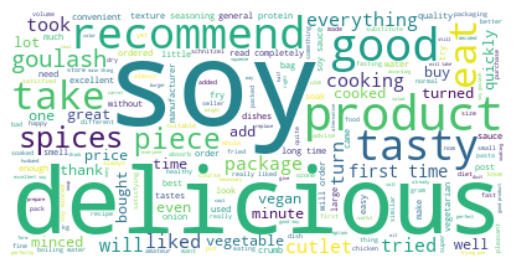

In [ ]:
text = " ".join(review for review in df.translation)
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["meat",'cook','taste'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Factorization
Check out
https://medium.com/analytics-vidhya/google-play-store-apps-reviews-scraping-and-text-analytics-sentiment-analysis-5303294fffa7

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Check the information 
sentiment.info()

In [ ]:
sentiment_factorized = sentiment.copy()
# TODO! create new column with strongest sentiment per row (sentiment name in str) and use it below as a var!
# Perform factorization on sentiment column
sentiment_factorized.sentiment = pd.factorize(sentiment_factorized.sentiment)[0] 

In [ ]:
sentiment_factorized['score'] = sentiment_factorized['score'].astype(int)
sentiment_factorized.info()

In [ ]:
# Group by sentiment (factorized) & review score
sentiment_factorized.groupby(['sentiment','score'])['content'].count()

In [ ]:
fig, ax = plt.subplot()
fig.set_size_inches(12,8)
plt.title('Statistical analysis by sentiment score and review score',fontsize=10)
sns.regplot(x='sentiment',y='score',data=sentiment_factorized)
sns.despine()